<a href="https://colab.research.google.com/github/Ys-Prakash/transcv/blob/master/SwinT_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hide
# skip 
!pip install nbdev fastai transcv timm -q --upgrade

     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 186 kB 21.0 MB/s 
     |████████████████████████████████| 376 kB 41.5 MB/s 
     |████████████████████████████████| 51 kB 288 kB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 2.9 MB 48.0 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 636 kB 53.5 MB/s 
     |████████████████████████████████| 3.3 MB 49.6 MB/s 
     |████████████████████████████████| 895 kB 41.6 MB/s 
     |████████████████████████████████| 1.2 MB 51.7 MB/s 


In [ ]:
# hide
# all_slow

# A tutorial for SwinT

> In this tutorial, we will create a Swin transformer model and use it for visual recognition .

## **Imports**

In [ ]:
from fastai.vision.all import *
from transcv.swin import *

## **Datasets & Dataloaders**

In [ ]:
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=lambda x: x[0].isupper(), item_tfms=Resize(224), bs = 32)

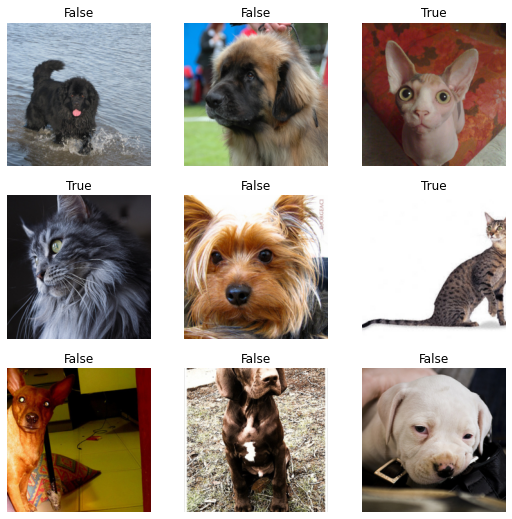

In [ ]:
dls.show_batch()

## **Swin transformer model**

We create a Swin transformer using the SwinT class

In [ ]:
swint_ob = SwinT('swin_base_patch4_window7_224', pretrained = True, num_classes = dls.c)
swin_model = swint_ob.get_model()

Downloading: "https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22kto1k.pth" to /root/.cache/torch/hub/checkpoints/swin_base_patch4_window7_224_22kto1k.pth


In [ ]:
learn = Learner(dls, swin_model, loss_func = CrossEntropyLossFlat(), metrics = accuracy).to_fp16()

In [ ]:
learn.summary()

Sequential (Input shape: 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 128 x 56 x 56  
Conv2d                                    6272       True      
LayerNorm                                 256        True      
Dropout                                                        
LayerNorm                                 256        True      
____________________________________________________________________________
                     32 x 49 x 384       
Linear                                    49536      True      
Dropout                                                        
Linear                                    16512      True      
Dropout                                                        
Softmax                                                        
Identity                                                       
LayerNorm                                 256        True      
__________________________________________

SuggestedLRs(valley=1.2022644114040304e-05)

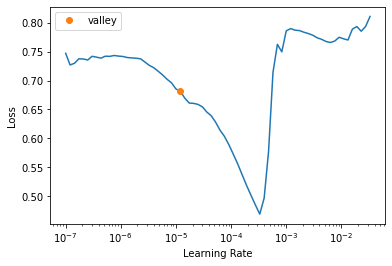

In [ ]:
learn.lr_find()

## **Training & Evaluation**

In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.022827,0.003018,0.998647,37:26
